In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output

In [2]:
data=pd.read_csv('USA_Housing.csv')

In [3]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [4]:
data.shape

(5000, 7)

First 2500 values for training data set


In [5]:
target_train=data['Price']
target_train=target_train[:2500]
features_train=data.drop(['Price'],axis=1).copy() #slecting features and target variables
features_train=data.drop('Address',axis=1)
features_train=features_train[:2500]


In [6]:
features_train=features_train.select_dtypes(include=['int32','int64'])



In [7]:
features_train.shape


(2500, 0)

In [8]:
target_train.shape

(2500,)

In [9]:
#defining the functions for trainig data set
def curve(m,x,c):
    return np.dot(m,x.T)+c   

def error(m,x,c,y,reg_parm):
    return np.mean((curve(m,x,c)-y)**2)+reg_parm*(np.sum(m)**2)
    
def derivative_intercept(m,x,c,y):
        return 2*np. mean(curve(m,x,c)-y)
def acc(error,y):
    arrow=error/np.mean(y**2)*100
    return 100-arrow




In [10]:
def derivative_slope(m,x,c,y,reg_parm):
    k=curve(m,x,c)-y
    k=np.array(k)
    temp=2*np.mean((np.multiply(k,x.T)),axis=1)
    temp=np.array(temp)
    temp=np.reshape(temp,(1,len(temp)))
    return temp
    return temp+2*reg_parm*(np.sum(m)**2)

In [11]:
target_train=np.array(target_train)
target_train=np.reshape(target_train,(1,len(target_train)))
target_train.shape

(1, 2500)

In [12]:
len(target_train)

1

In [13]:
target_train.shape

(1, 2500)

In [14]:
m=abs(np.random.randn(1,len(features_train.T)))
c=abs(random.random())

In [15]:
features_train=features_train/features_train.max()
target_train=target_train/target_train.max()

data=data.dropna(axis=0)

error: 0.020632197446035325
accuracy: 92.36011354296855


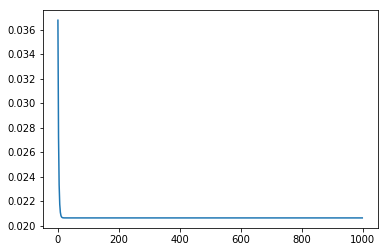

In [16]:

reg_parm=6
cost=[]
lr=0.1
for i in range(0,1000):
    m=m-lr*derivative_slope(m,features_train,c,target_train,reg_parm)
    c=c-lr*derivative_intercept(m,features_train,c,target_train)
    cost.append(error(m,features_train,c,target_train,reg_parm))
    clear_output(True)
    print('error:',error(m,features_train,c,target_train,reg_parm))
    print('accuracy:',acc(error(m,features_train,c,target_train,reg_parm),target_train)) 
    
plt.plot(cost)
plt.show()

# for testing data set

In [17]:
target_test=data['Price']
target_test=target_test[2500:]
features_test=data.drop(['Price'],axis=1).copy() #slecting features and target variables
features_test=data.drop('Address',axis=1)
features_test=features_test[2500:]


In [19]:
features_test=features_test.select_dtypes(include=['int32','int64'])




In [20]:
target_test.shape

(2500,)

In [21]:
target_test=np.array(target_test)
target_test=np.reshape(target_test,(1,len(target_test.T)))
target_test.shape

(1, 2500)

In [29]:
#defining the functions for testing data set
def curve(m,x,c):
    return np.dot(m,x.T)+c   

def error(m,x,c,y,reg_parm):
    return np.mean((curve(m,x,c)-y)**2)+reg_parm*(np.sum(m)**2)

    
def derivative_intercept(m,x,c,y):
        return 2*np. mean(curve(m,x,c)-y)


def accuracy_pred(error,y):
    arrow= error/np.mean(y**2)*100
    return 100- arrow
    



In [23]:
def derivative_slope(m,x,c,y,reg_parm):
    k=curve(m,x,c)-y
    k=np.array(k)
    temp=2*np.mean((np.multiply(k,x.T)),axis=1)
    temp=np.array(temp)
    temp=np.reshape(temp,(1,len(temp)))
    return temp
    return temp+2*reg_parm*(np.sum(m)**2)


In [24]:
m=abs(np.random.randn(1,len(features_test.T)))
c=abs(random.random())

In [25]:
features_test=features_test/features_test.max()
target_test=target_test/target_test.max()

data=data.dropna(axis=0)

error 0.021992236154766847
accuracy 92.46165254530159


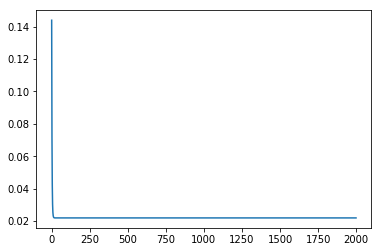

In [28]:

reg_parm=6
cost=[]
lr=0.1
for i in range(0,2000):
    m=m-lr*derivative_slope(m,features_test,c,target_test,reg_parm)
    c=c-lr*derivative_intercept(m,features_test,c,target_test)
    cost.append(error(m,features_test,c,target_test,reg_parm))
    clear_output(True)
    print('error',error(m,features_test,c,target_test,reg_parm))
    print('accuracy',accuracy_pred(error(m,features_test,c,target_test,reg_parm),target_test))
    
plt.plot(cost)
plt.show()